# Unsupervised Learning


In [61]:
import pandas as pd
import numpy as np   
from sklearn.linear_model import LinearRegression    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

### 1.1 a -Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [2]:
car_name = pd.read_csv('Part1+-+Car+name.csv')

In [3]:
car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


### 1.1 b -Read ‘Car-Attributes.json as a DataFrame and assign it to a variable

In [4]:
car_attributes = pd.read_json('Part1+-+Car-Attributes.json')

In [6]:
car_attributes.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### 1.1 c -Merge both the DataFrames together to form a single DataFrame

In [22]:
Data = pd.concat([car_name, car_attributes],  axis=1)

Data

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


### 1.1 d -Print 5 point summary of the numerical features and share insights

* all the attributes has 398 rows
* MPG has minimum of 9 and maximum of 46
* cyl has minimum of 3 and maximum of 8
* disp has minimum of 68 and maximum of 455
* wt has minimum of 1613 and maximum of 5140
* acc has minimum of 8 and maximum of 24
* From the pairplot, its very clear that as weight increases Mpg has significant decrease

In [24]:
Data.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1.2 a -Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [31]:
missing_percentage = Data.isnull().mean() * 100
print("Feature-wise percentage of missing values:\n", missing_percentage)


Feature-wise percentage of missing values:
 car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


### 1.2 b -Check for duplicate values in the data and impute with the best suitable approach.

In [35]:
duplicates = Data.duplicated()
print("Duplicate rows in the DataFrame:\n", Data[duplicates])


Duplicate rows in the DataFrame:
 Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []


### 1.2 c -Plot a pairplot for all features

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

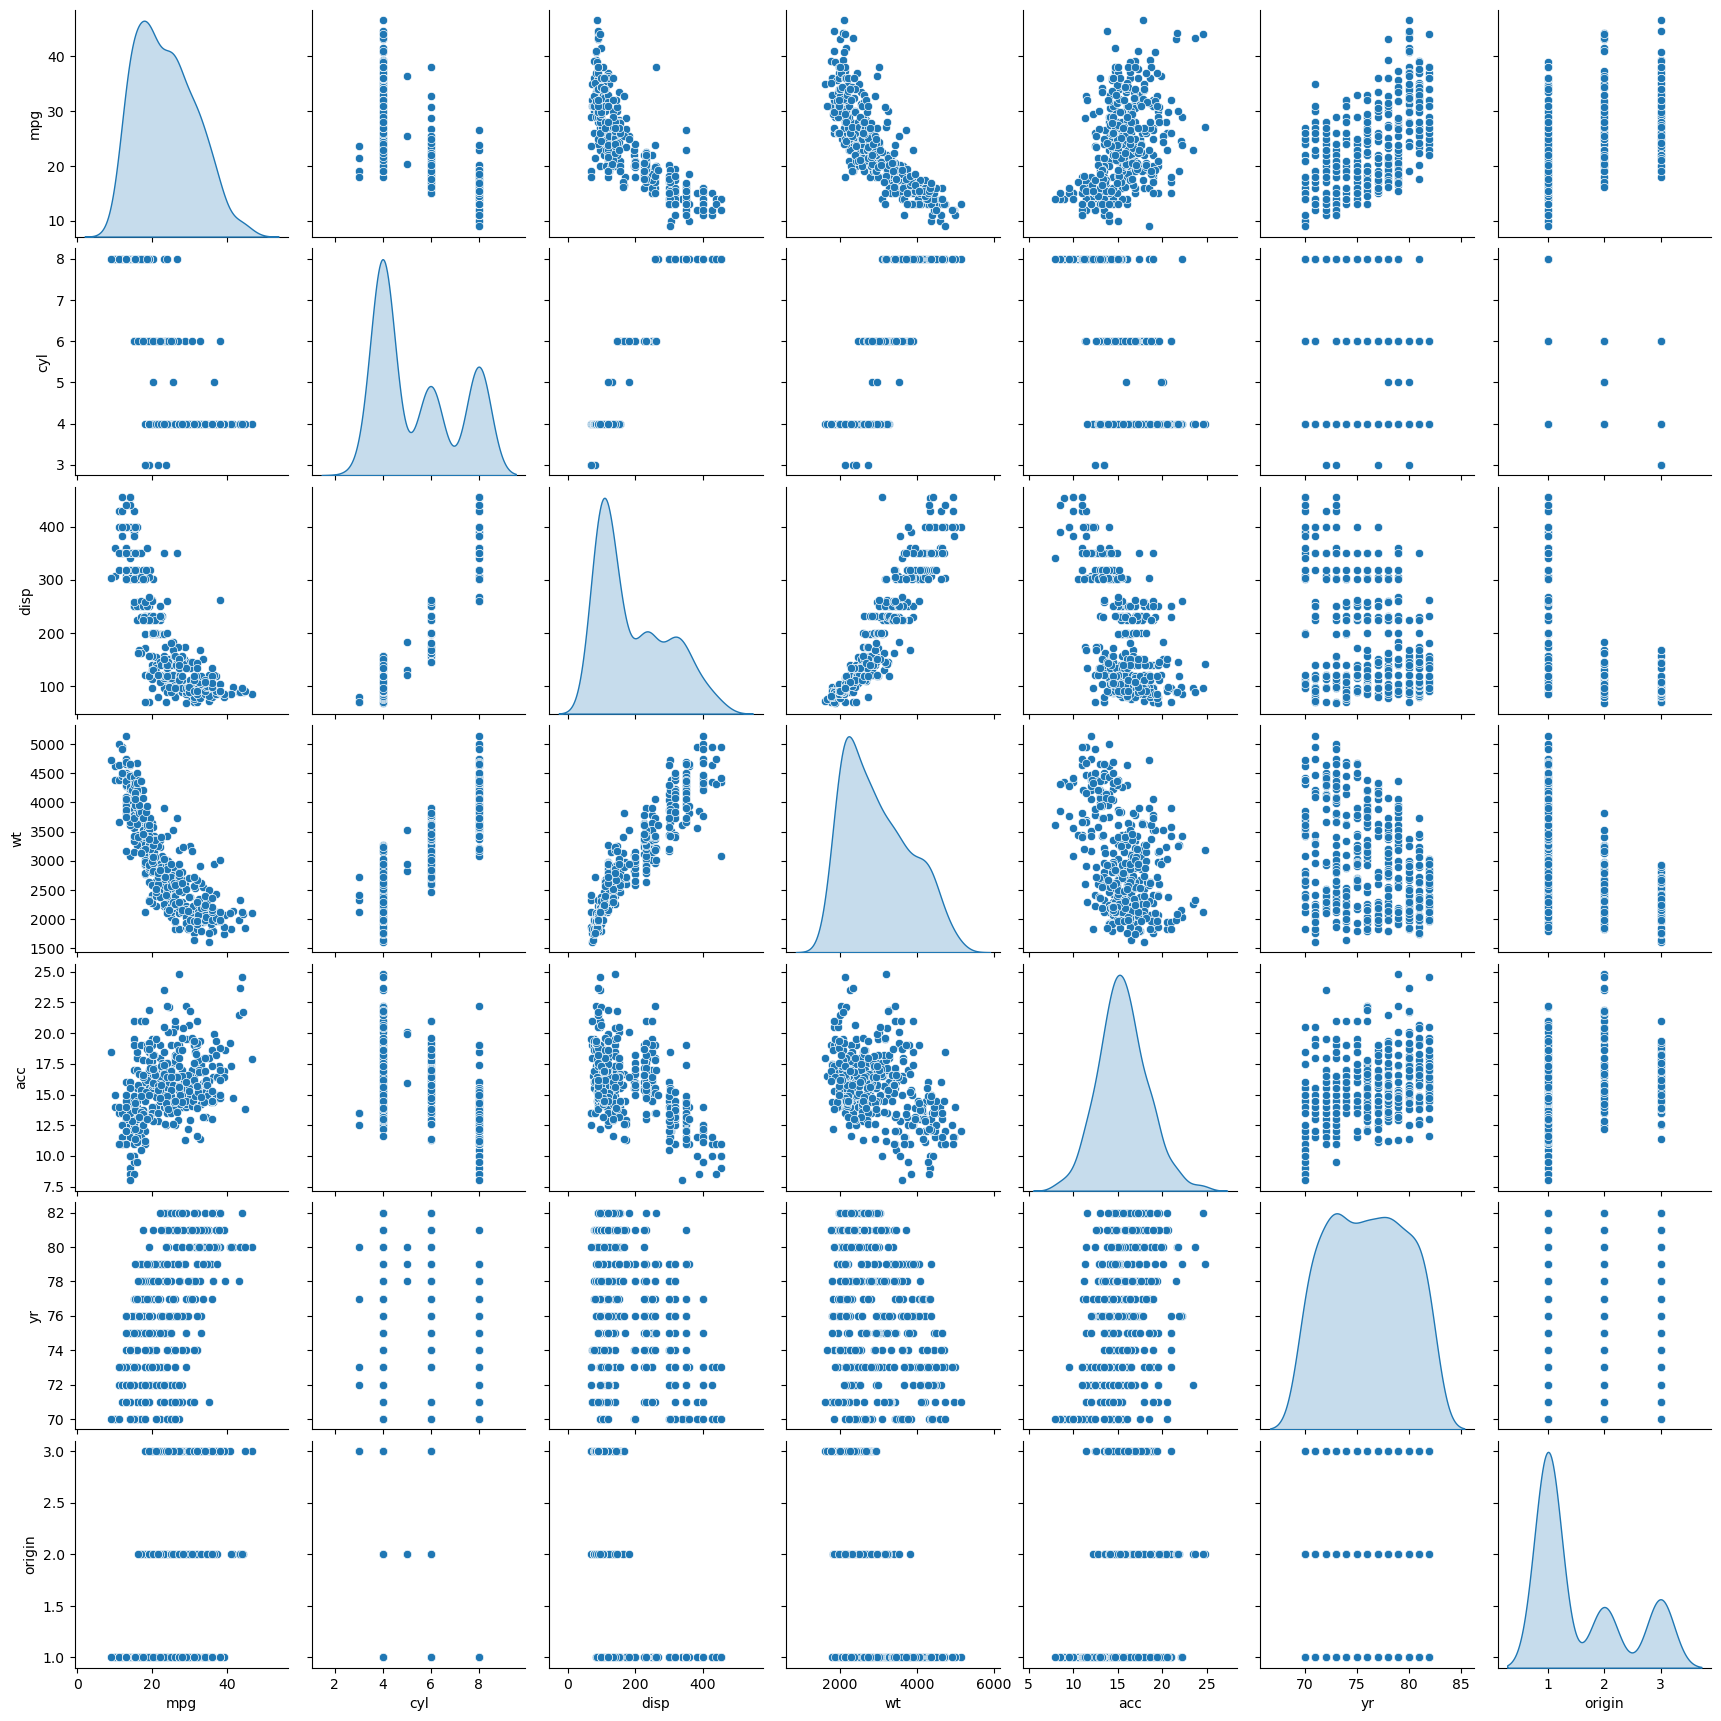

In [40]:
sns.pairplot(Data, diag_kind='kde');

### 1.2 d -Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl

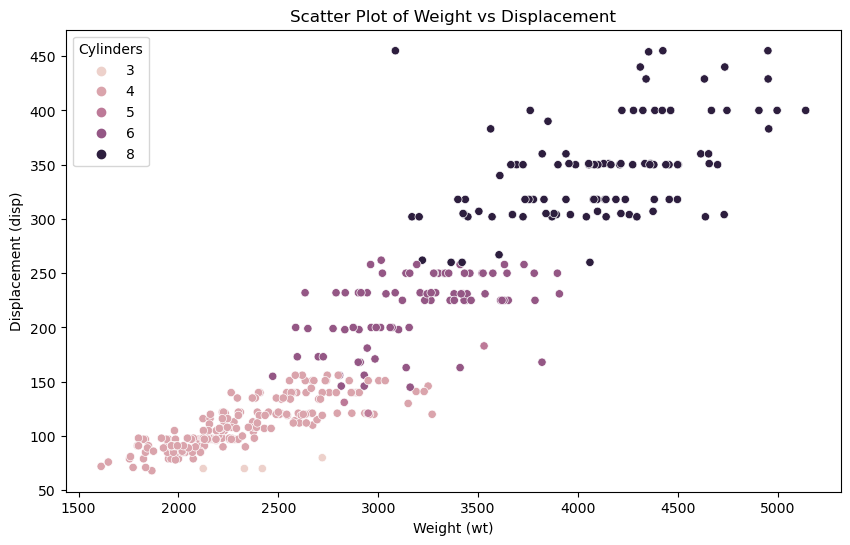

In [45]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=Data, x='wt', y='disp', hue='cyl')

plt.title('Scatter Plot of Weight vs Displacement')
plt.xlabel('Weight (wt)')
plt.ylabel('Displacement (disp)')
plt.legend(title='Cylinders')

plt.show()

### 1.2 e -Share insights for Q2.d

* Cars weighing less which is around 1500 to 3000 Kg consists of 3 or 4 cylinders only.
  as a result it provides less displcement of 50 to 150 Kms.
* Cars weighing around 3000 to 4000 Kg consists of 5 or 7 cylinders .
  So, as a result it provides average displcement of 150 to 250 Kms.
* Cars which has 8 cylinders , definitely weighs more and provide more displacement.
* In some outlier case, car with 8 cylinders have average weight but provide more displacement.


### 1.2 f -Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

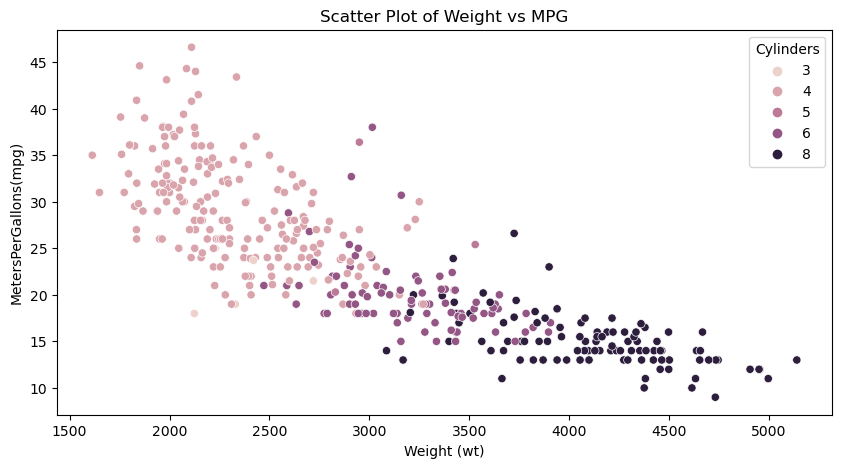

In [51]:
plt.figure(figsize=(10, 5))
scatter_plot = sns.scatterplot(data=Data, x='wt', y='mpg', hue='cyl')

plt.title('Scatter Plot of Weight vs MPG')
plt.xlabel('Weight (wt)')
plt.ylabel('MetersPerGallons(mpg)')
plt.legend(title='Cylinders')

plt.show()

### 1.2 g-Share insights for Q2.f.

* From the scatter plot, it is clear that as weight of the car increases the MPG decreases.
* MPG is inversly proportional to weight.
* Car with weight 1500 to 3000 is covering 20 to 45 MPG
* whereas cars with more weight could cover only upto 10 to 20 MPG

### 1.2 h -Check for unexpected values in all the features and datapoints with such values.

In [53]:
dupes = Data.duplicated()
sum(dupes)


0

In [59]:
pd.DataFrame( Data.isnull().sum(), columns= ['Number of missing values'])


,Number of missing values
car_name,0
mpg,0
cyl,0
disp,0
hp,0
wt,0
acc,0
yr,0
origin,0


In [65]:
Data.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [68]:
non_numeric_hp = pd.to_numeric(Data['hp'], errors='coerce').isna()

non_numeric_rows = Data[non_numeric_hp]
print("Rows with non-numeric values in 'hp':")
print(non_numeric_rows)

Rows with non-numeric values in 'hp':
                 car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1


In [69]:
Data['hp'] = pd.to_numeric(Data['hp'], errors='coerce')

Data_cleaned = Data.dropna(subset=['hp'])

print("DataFrame after removing rows with non-numeric 'hp' values:")
print(Data_cleaned)

DataFrame after removing rows with non-numeric 'hp' values:
                      car_name   mpg  cyl   disp     hp    wt   acc  yr  \
0    chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70   
1            buick skylark 320  15.0    8  350.0  165.0  3693  11.5  70   
2           plymouth satellite  18.0    8  318.0  150.0  3436  11.0  70   
3                amc rebel sst  16.0    8  304.0  150.0  3433  12.0  70   
4                  ford torino  17.0    8  302.0  140.0  3449  10.5  70   
..                         ...   ...  ...    ...    ...   ...   ...  ..   
393            ford mustang gl  27.0    4  140.0   86.0  2790  15.6  82   
394                  vw pickup  44.0    4   97.0   52.0  2130  24.6  82   
395              dodge rampage  32.0    4  135.0   84.0  2295  11.6  82   
396                ford ranger  28.0    4  120.0   79.0  2625  18.6  82   
397                 chevy s-10  31.0    4  119.0   82.0  2720  19.4  82   

     origin  
0         1  
1         1

### 1.3 a -Apply K-Means clustering for 2 to 10 clusters

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

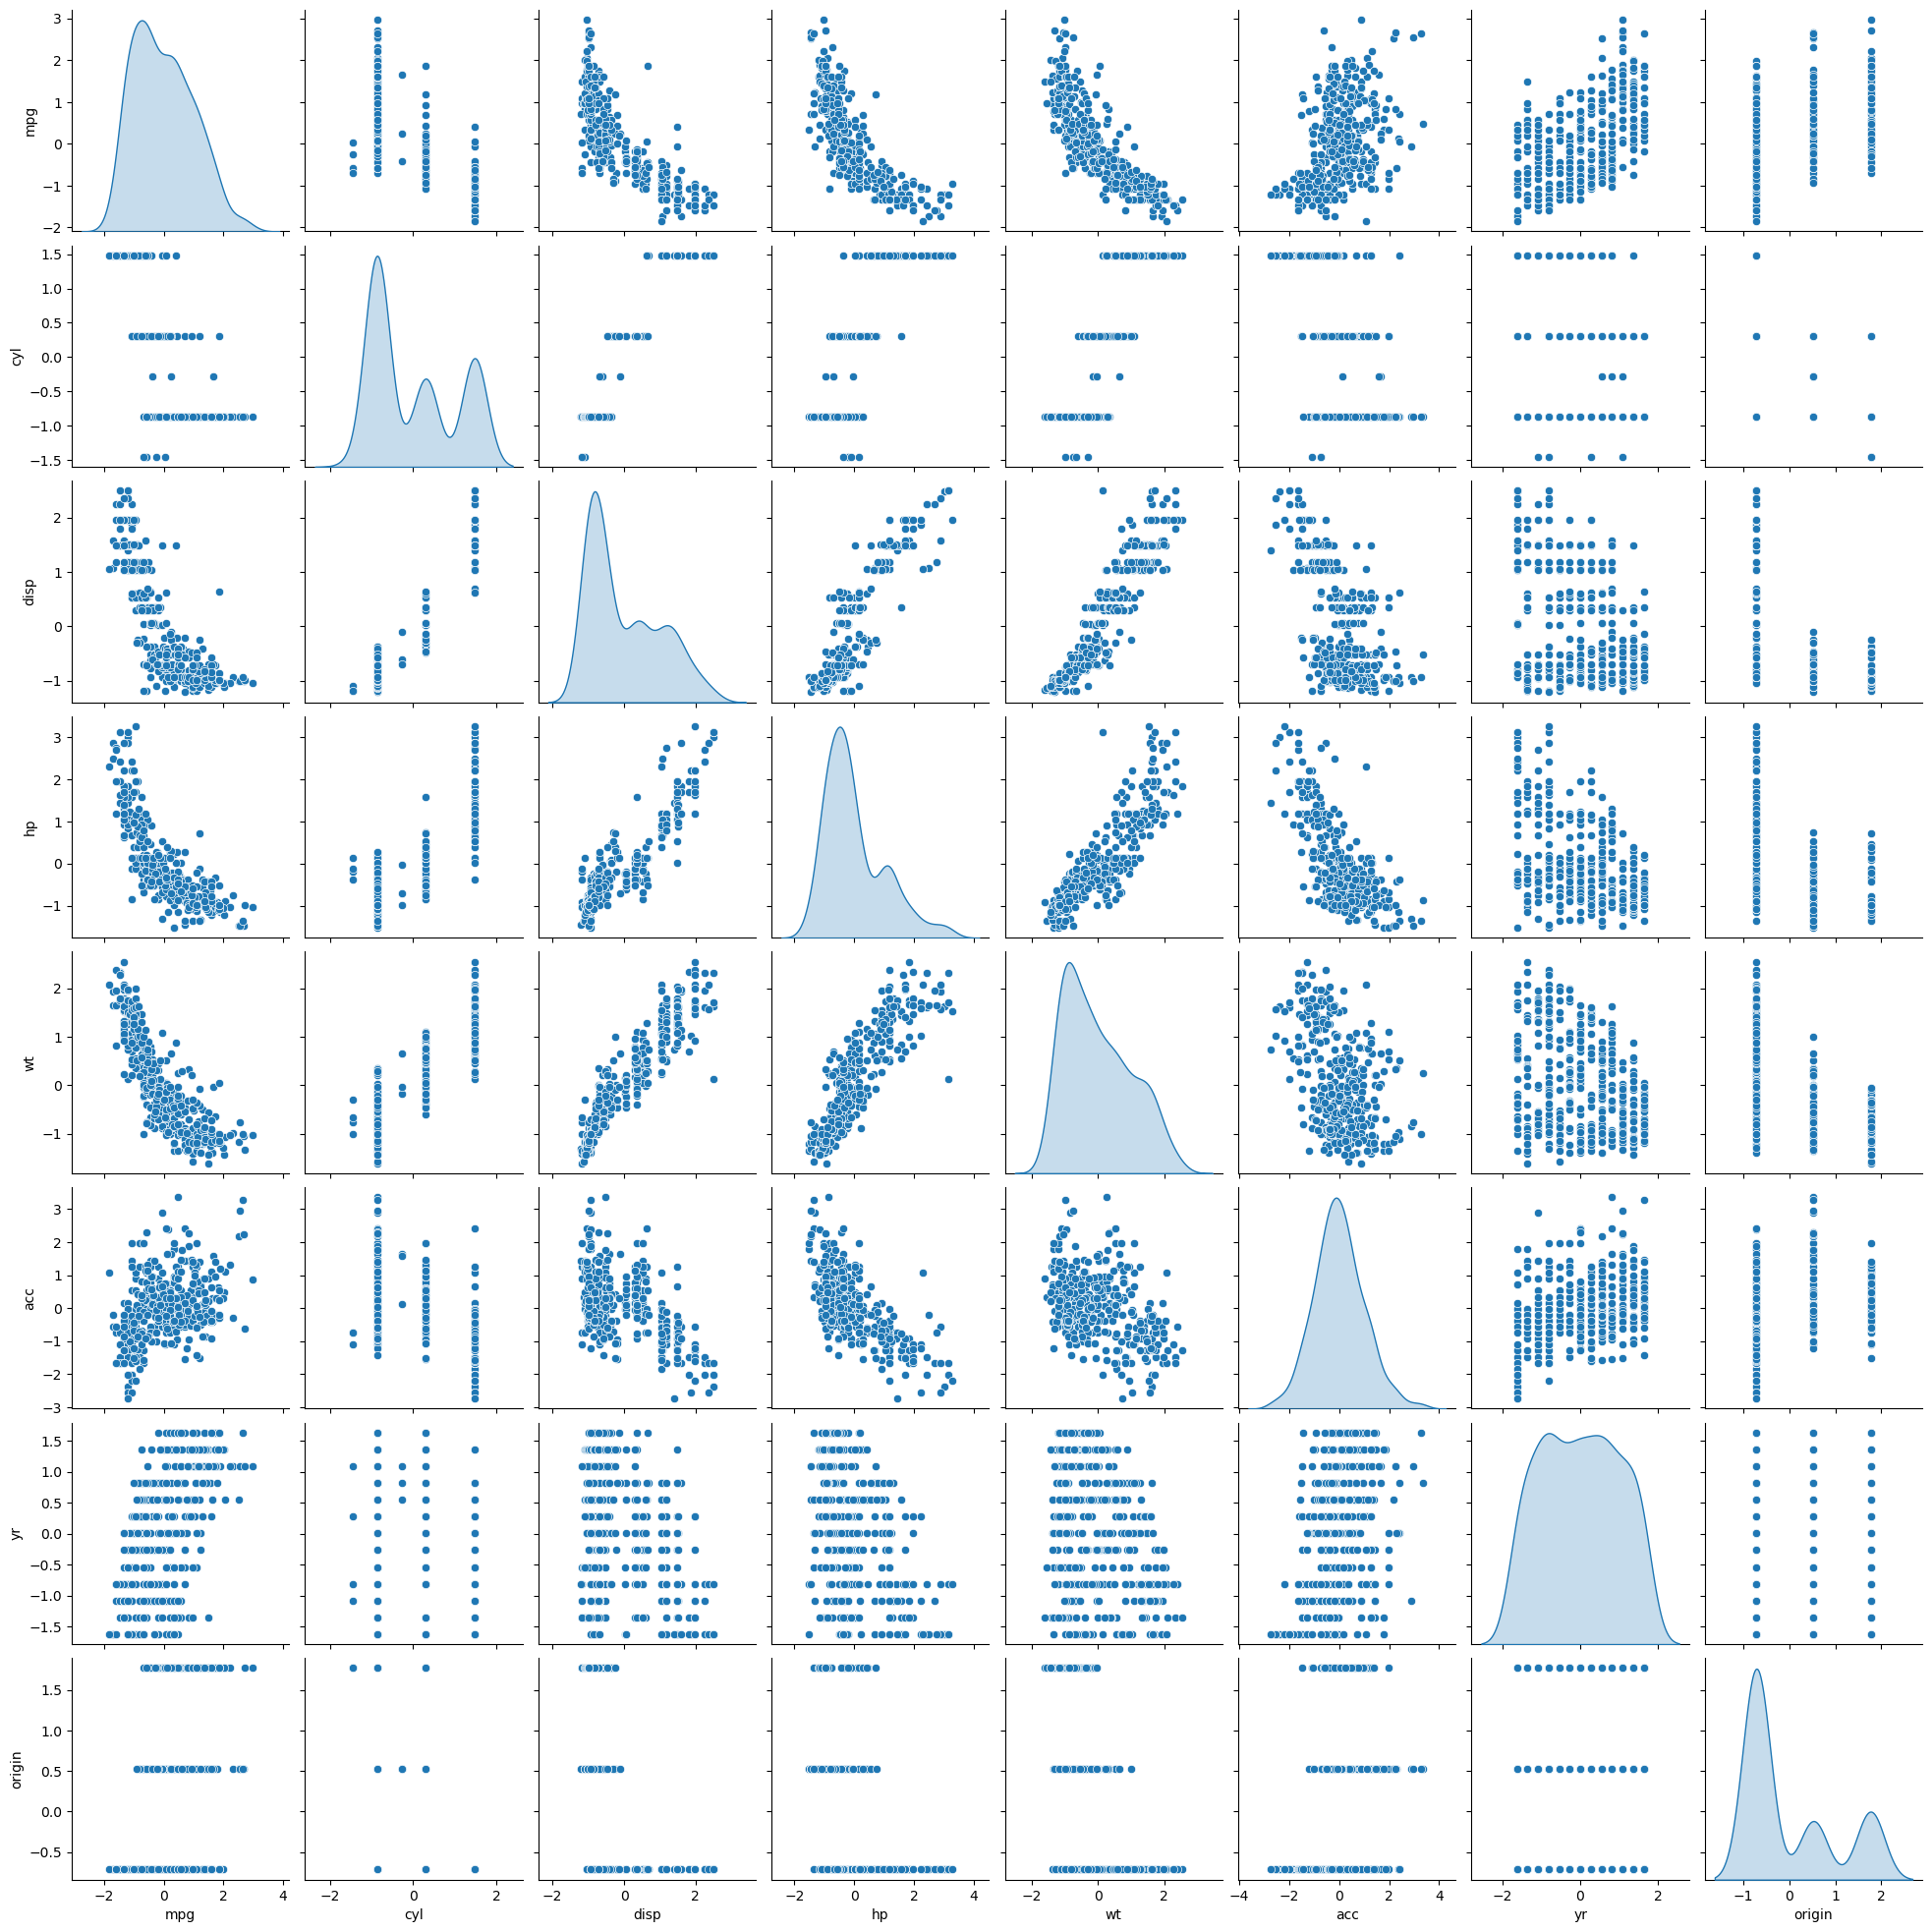

In [79]:
techSuppAttr=Data_cleaned.iloc[:,1:]
Data_Scaled=techSuppAttr.apply(zscore)
sns.pairplot(Data_Scaled,diag_kind='kde')


In [82]:
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Data_Scaled)
    prediction=model.predict(Data_Scaled)
    meanDistortions.append(sum(np.min(cdist(Data_Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / Data_Scaled.shape[0])




C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

### 1.3 b -Plot a visual and find elbow point

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

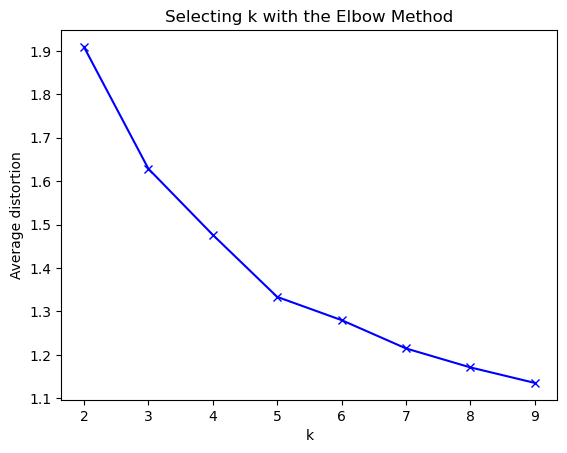

In [83]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### 1.3 c -On the above visual, highlight which are the possible Elbow points.

 let us look at 4 clusters and 6 clusters where there is a significant bend is seen

### 1.3 d -Train a K-means clustering model once again on the optimal number of clusters

In [94]:
final_model=KMeans(4)
final_model.fit(Data_Scaled)
prediction=final_model.predict(Data_Scaled)



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### 1.3 e -Add a new feature in the DataFrame which will have labels based upon cluster value

In [95]:
Data_cleaned["GROUP"] = prediction
Data_Scaled["GROUP"] = prediction
print("Groups Assigned : \n")
Data_cleaned

Groups Assigned : 



C:\Users\DELL\AppData\Local\Temp\ipykernel_22820\2424138489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_cleaned["GROUP"] = prediction


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,0
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,2
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,2


### 1.3 f -Plot a visual and color the datapoints based upon clusters.

array([[<Axes: title={'center': 'acc'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'disp'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'hp'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'mpg'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'origin'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'wt'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'yr'}, xlabel='[GROUP]'>]], dtype=object)

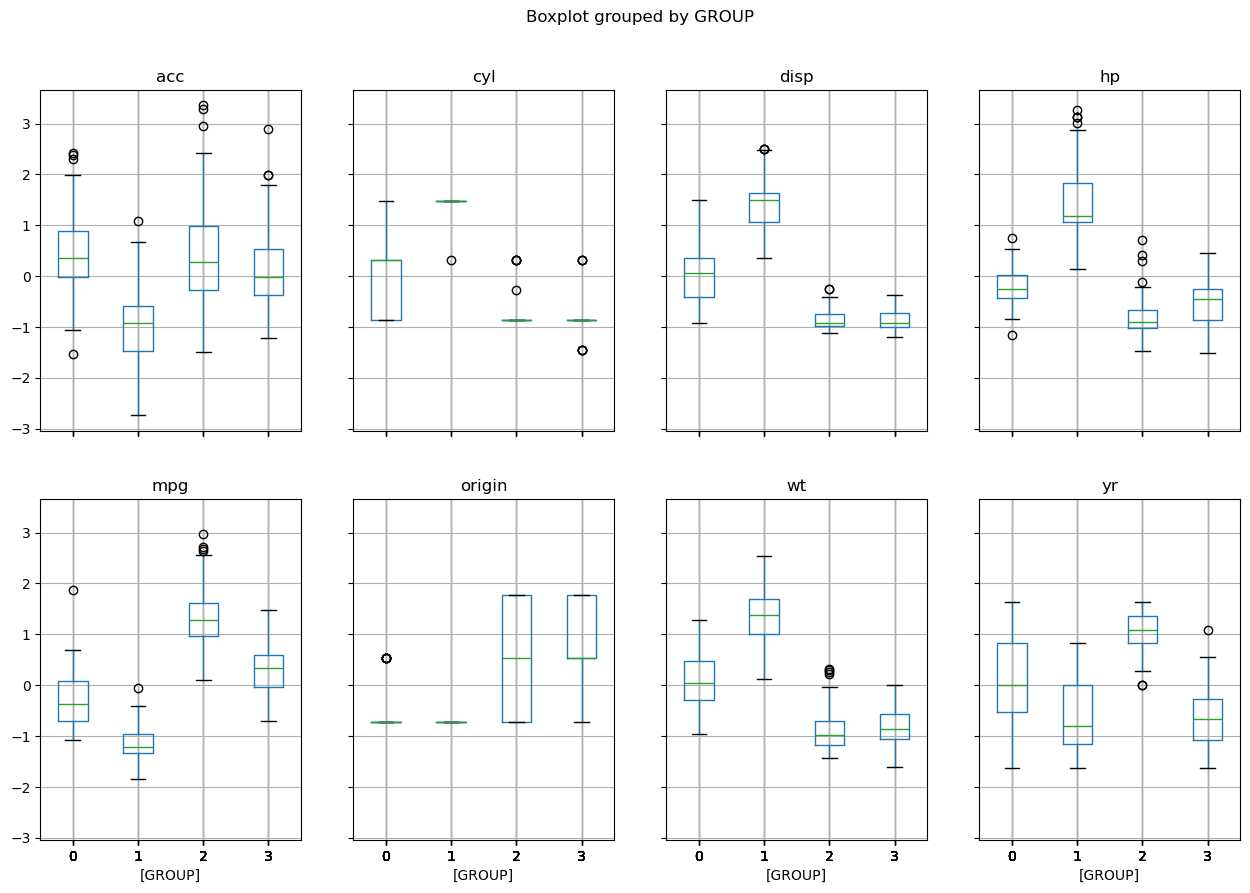

In [98]:
Data_Scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))


### 1.3 g Pass a new DataPoint and predict which cluster it belongs to

In [96]:
Data_Clust = Data_Scaled.groupby(['GROUP'])
Data_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,-0.277751,-0.042227,0.020697,-0.229204,0.084951,0.430802,0.121067,-0.633773
1,-1.120060,1.472207,1.453998,1.458836,1.354828,-1.023585,-0.606026,-0.716641
2,1.357796,-0.805315,-0.851811,-0.827290,-0.871326,0.422938,1.101849,0.747364
3,0.282128,-0.849697,-0.868542,-0.535646,-0.820215,0.153632,-0.647461,0.981147


### 2. 1 a -Read ‘vehicle.csv’ and save as DataFrame

In [134]:
vehicle = pd.read_csv('vehiclerenme.csv')

In [135]:
vehicle

,compactness,circularity,distance_circularity,radius_ratio,praxis_aspect_ratio,maxlength_aspect_ratio,scatter_ratio,elongatedness,praxis_rectangularity,maxlength_rectangularity,scaled_variance,scaled_variance1,scaled_radius_of_gyration,scaled_radius_of_gyration1,skewness_about,skewness_about1,skewness_about2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


### 2.1 b-Check percentage of missing values and impute with correct approach

In [136]:
dup = vehicle.duplicated()
sum(dup)

0

In [137]:
pd.DataFrame( vehicle.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
praxis_aspect_ratio,2
maxlength_aspect_ratio,0
scatter_ratio,1
elongatedness,1
praxis_rectangularity,3
maxlength_rectangularity,0


In [138]:
vehicle.isnull().sum().sum()  

41

In [147]:
vehicle['circularity'].fillna(vehicle.circularity.mean(), inplace = True)  
vehicle['distance_circularity'].fillna(vehicle.distance_circularity.median(), inplace = True)  
vehicle['scaled_variance'].fillna(vehicle.scaled_variance.median(), inplace = True)  
vehicle['scatter_ratio'].fillna(vehicle.scatter_ratio.mean(), inplace = True)  
vehicle['elongatedness'].fillna(vehicle.elongatedness.mean(), inplace = True)  
vehicle['scaled_radius_of_gyration'].fillna(vehicle.scaled_radius_of_gyration.median(), inplace = True)  
vehicle['skewness_about'].fillna(vehicle.skewness_about.mean(), inplace = True)  
vehicle['elongatedness'].fillna(vehicle.elongatedness.mean(), inplace = True)
vehicle['praxis_aspect_ratio'].fillna(vehicle.praxis_aspect_ratio.mean(), inplace = True)  
vehicle['maxlength_aspect_ratio'].fillna(vehicle.maxlength_aspect_ratio.mean(), inplace = True)
vehicle['radius_ratio'].fillna(vehicle.radius_ratio.mean(), inplace = True)  
vehicle['praxis_aspect_ratio'].fillna(vehicle.praxis_aspect_ratio.mean(), inplace = True)
vehicle['praxis_rectangularity'].fillna(vehicle.praxis_rectangularity.mean(), inplace = True)  
vehicle['scaled_variance1'].fillna(vehicle.scaled_variance1.mean(), inplace = True)  
vehicle['scaled_radius_of_gyration1'].fillna(vehicle.scaled_radius_of_gyration1.mean(), inplace = True)  
vehicle['skewness_about1'].fillna(vehicle.skewness_about1.mean(), inplace = True)
vehicle['skewness_about2'].fillna(vehicle.skewness_about2.mean(), inplace = True)  

In [148]:
pd.DataFrame( vehicle.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
compactness,0
circularity,0
distance_circularity,0
radius_ratio,0
praxis_aspect_ratio,0
maxlength_aspect_ratio,0
scatter_ratio,0
elongatedness,0
praxis_rectangularity,0
maxlength_rectangularity,0


In [149]:
vehicle.isnull().sum().sum()  

0

### 2.1 c-Visualize a Pie-chart and print percentage of values for variable ‘class’

class
car    50.709220
bus    25.768322
van    23.522459
Name: count, dtype: float64


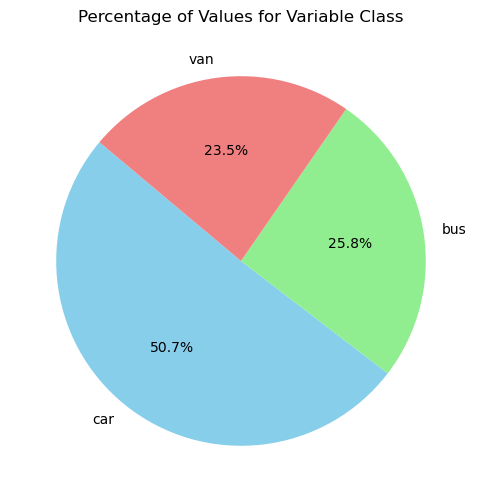

In [150]:
class_counts = vehicle['class'].value_counts()

class_percentages = (class_counts / class_counts.sum()) * 100
print(class_percentages)

plt.figure(figsize=(8, 6))
plt.pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Percentage of Values for Variable Class')
plt.show()

### 2.1 d -Check for duplicate rows in the data and impute with correct approach

In [151]:
duplicate_rows = vehicle[vehicle.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, praxis_aspect_ratio, maxlength_aspect_ratio, scatter_ratio, elongatedness, praxis_rectangularity, maxlength_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration, scaled_radius_of_gyration1, skewness_about, skewness_about1, skewness_about2, hollows_ratio, class]
Index: []


### 2.2 a -Split data into X and Y

In [154]:
X = vehicle.drop('class', axis=1)
Y = vehicle['class']

In [156]:
X

,compactness,circularity,distance_circularity,radius_ratio,praxis_aspect_ratio,maxlength_aspect_ratio,scatter_ratio,elongatedness,praxis_rectangularity,maxlength_rectangularity,scaled_variance,scaled_variance1,scaled_radius_of_gyration,scaled_radius_of_gyration1,skewness_about,skewness_about1,skewness_about2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195


In [157]:
Y

0      van
1      van
2      car
3      van
4      bus
      ... 
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 846, dtype: object

### 2.2 b -Standardize the Data

In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

   compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.057177      0.272965   
1    -0.325470    -0.624564              0.120741     -0.835442   
2     1.254193     0.843549              1.519141      1.201630   
3    -0.082445    -0.624564             -0.006386     -0.296217   
4    -1.054545    -0.135193             -0.769150      1.081803   

   praxis_aspect_ratio  maxlength_aspect_ratio  scatter_ratio  elongatedness  \
0             1.310206                0.311542      -0.208038       0.136580   
1            -0.593962                0.094079      -0.599893       0.520853   
2             0.548539                0.311542       1.148382      -1.144331   
3             0.167705                0.094079      -0.750606       0.648945   
4             5.245485                9.444962      -0.599893       0.520853   

   praxis_rectangularity  maxlength_rectangularity  scaled_variance  \
0              -0.225160                  0.7

###  2.3 a -Train a base Classification model using SVM.

In [167]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, Y_train)


SVC(kernel='linear')

### 2.3 b -Print Classification metrics for train data.

In [168]:

Y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.9352941176470588
Classification Report:
               precision    recall  f1-score   support

         bus       0.91      0.94      0.92        52
         car       0.96      0.91      0.93        78
         van       0.93      0.97      0.95        40

    accuracy                           0.94       170
   macro avg       0.93      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170



 ### 2.3 c -Apply PCA on the data with 10 components

In [169]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

print("Cumulative Explained Variance Ratio:", sum(pca.explained_variance_ratio_))

print("Shape of X_pca:", X_pca.shape)

Explained Variance Ratio: [0.52203787 0.16737045 0.1056228  0.06548337 0.05089303 0.02993385
 0.01989876 0.01230308 0.00888984 0.00508713]
Cumulative Explained Variance Ratio: 0.9875201719646178
Shape of X_pca: (846, 10)


### 2.3 d -Visualize Cumulative Variance Explained with Number of Components

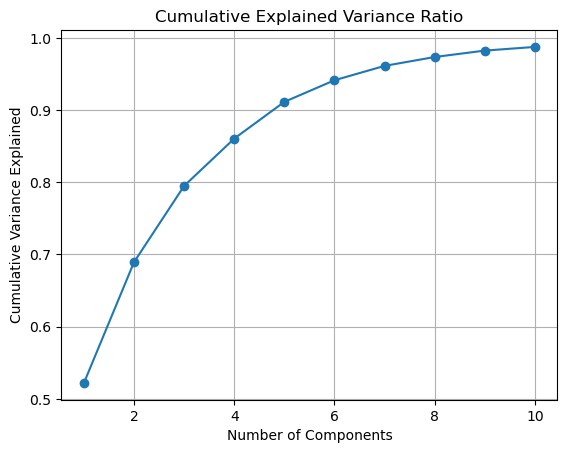

In [170]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

### 2.3 e -Draw a horizontal line on the above plot to highlight the threshold of 90%.

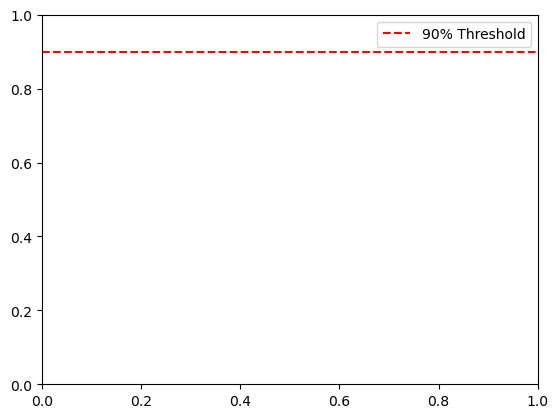

In [173]:

plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')

plt.legend()
plt.show()

###  2.3 f -Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [175]:

num_components_90 = np.argmax(cumulative_variance_ratio >= 0.9) + 1  # Add 1 because indexing starts from 0

pca = PCA(n_components=num_components_90)
X_pca = pca.fit_transform(X_scaled)

print("Number of Components Selected (explaining 90% or above variance):", num_components_90)

Number of Components Selected (explaining 90% or above variance): 5


### 2.3 g -Train SVM model on components selected from above step

In [179]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train_pca, y_train)

y_pred_pca = svm_classifier.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy of SVM classifier with PCA-transformed features:", accuracy_pca)

Accuracy of SVM classifier with PCA-transformed features: 0.6411764705882353


###  2.3 h -Print Classification metrics for train data of above model and share insights

In [180]:
y_train_pred_pca = svm_classifier.predict(X_train_pca)

print("Classification Report for Training Data with PCA-transformed features:")
print(classification_report(y_train, y_train_pred_pca))

Classification Report for Training Data with PCA-transformed features:
              precision    recall  f1-score   support

         bus       0.59      0.55      0.57       166
         car       0.76      0.83      0.80       351
         van       0.57      0.50      0.53       159

    accuracy                           0.68       676
   macro avg       0.64      0.63      0.63       676
weighted avg       0.67      0.68      0.68       676



### 2.5 b -Explain advantages and limitations of PCA

##### Advantages	
Dimensionality Reduction,	
Feature Extraction,
Data Visualization,
Noise Reduction
##### Limitations
Loss of Interpretability, Assumption of Linearity, Orthogonality Assumption


